In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (14, 10)


import warnings
warnings.filterwarnings("ignore")


# Dataset
| Features	                | Description                                         v                                        |
| ------------------------- | -------------------------------------------------------------------------------------------- |
| Item_Identifier	        | Unique product ID                                                                            |
| Item_Weight	            | Weight of product                                                                            |
| Item_Fat_Content	        | Whether the product is low fat or not                                                        |
| Item_Visibility	        | The % of total display area of all products in a store allocated to the particular product   |
| Item_Type	                | The category to which the product belongs                                                    |
| Item_MRP	                | Maximum Retail Price (list price) of the product                                             |
| Outlet_Identifier	        | Unique store ID                                                                              |
| Outlet_Establishment_Year	| The year in which store was established                                                      |
| Outlet_Size	            | The size of the store in terms of ground area covered                                        |
| Outlet_Location_Type	    | The type of city in which the store is located                                               |
| Outlet_Type	            | Whether the outlet is just a grocery store or some sort of supermarket                       |
| Item_Outlet_Sales	        | Sales of the product in the particulat store. This is the outcome variable to be predicted   |

In [125]:
df = pd.read_csv("data/Train.csv")
df.columns = map(str.lower, df.columns)
test = pd.read_csv("data/Test.csv")
test.columns = map(str.lower, test.columns)

In [126]:
df.shape, test.shape

((8523, 12), (5681, 11))

In [127]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [129]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [130]:
df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [131]:
df.apply(lambda x: len(x.unique()))

item_identifier              1559
item_weight                   416
item_fat_content                5
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     4
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
dtype: int64

In [132]:
df[df["item_identifier"] == "FDA15"]

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [133]:
cat_cols = df.select_dtypes(include=["object"])
cat_cols.drop(["item_identifier", "outlet_identifier"], axis=1, inplace=True)
cat_cols

,item_fat_content,item_type,outlet_size,outlet_location_type,outlet_type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [134]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

item_fat_content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: item_fat_content, dtype: int64

item_type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

outlet_size
Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

outlet_location_type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

outlet_type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int6

---
# Data Cleaning
---

In [135]:
# Fill the missing values  Item Weight and outlet Size
# We replace the values with the average of the item identifiers
# fill the visibility of the produts that equal to 0
# replace fat content values to only 2 categories

def missing_weight(df):
    item_weight_mean = df.pivot_table(values="item_weight", index="item_identifier")
    missing_bool = df["item_weight"].isnull()

    for i, item in enumerate(df["item_identifier"]):
        if missing_bool[i]:
            if item in item_weight_mean:
                df["item_weight"][i] = item_weight_mean.loc[item]["item_weight"]
            else:
                df["item_weight"][i] = np.mean(df["item_weight"])
    return df

def missing_size(df):
    outlet_size_mode = df.pivot_table(values="outlet_size", columns="outlet_type", aggfunc=(lambda x: x.mode()[0]))
    missing_bool = df["outlet_size"].isnull()
    df.loc[missing_bool, "outlet_size"] = df.loc[missing_bool, "outlet_type"].apply(lambda x: outlet_size_mode[x])
    return df

def fill_item_visibility(df):
    df.loc[:, "item_visibility"].replace([0], [df["item_visibility"].mean()], inplace=True)
    return df

def replace_fat(df):
    df["item_fat_content"] = df["item_fat_content"].replace({"LF": "low fat", "Low Fat": "low fat", "reg": "Regular"})
    return df

def new_item(df):
    item_type_2 = pd.Series(df.item_identifier.apply(lambda x: x[:2]))
    df.insert(4, "item_type_2", item_type_2)
    df["item_type_2"] = df["item_type_2"].map({'FD': "food", 'DR': "drinks", 'NC': "non-consumable"})
    return df

def non_edible_fat(df):
    df.loc[df["item_type_2"]== "non-consumable", "item_fat_content"]  = "non-edible"
    return df

def year(df):
    df["outlet_establishment_year"] = (df["outlet_establishment_year"] -2013)*-1
    return df

def clean_data(df):
    df = missing_weight(df)
    df = missing_size(df)
    df = fill_item_visibility(df)
    df = replace_fat(df)
    df = new_item(df)
    df = non_edible_fat(df)
    df = year(df)
    return df

def get_clean_csv(df, name):
    df = clean_data(df)
    df.to_csv(f"data/{name}.csv")
    df_clean = pd.read_csv(f"data/{name}.csv", index_col=[0])
    return df_clean


In [136]:
df = get_clean_csv(df, "train_clean")

--- 
# EDA 
---

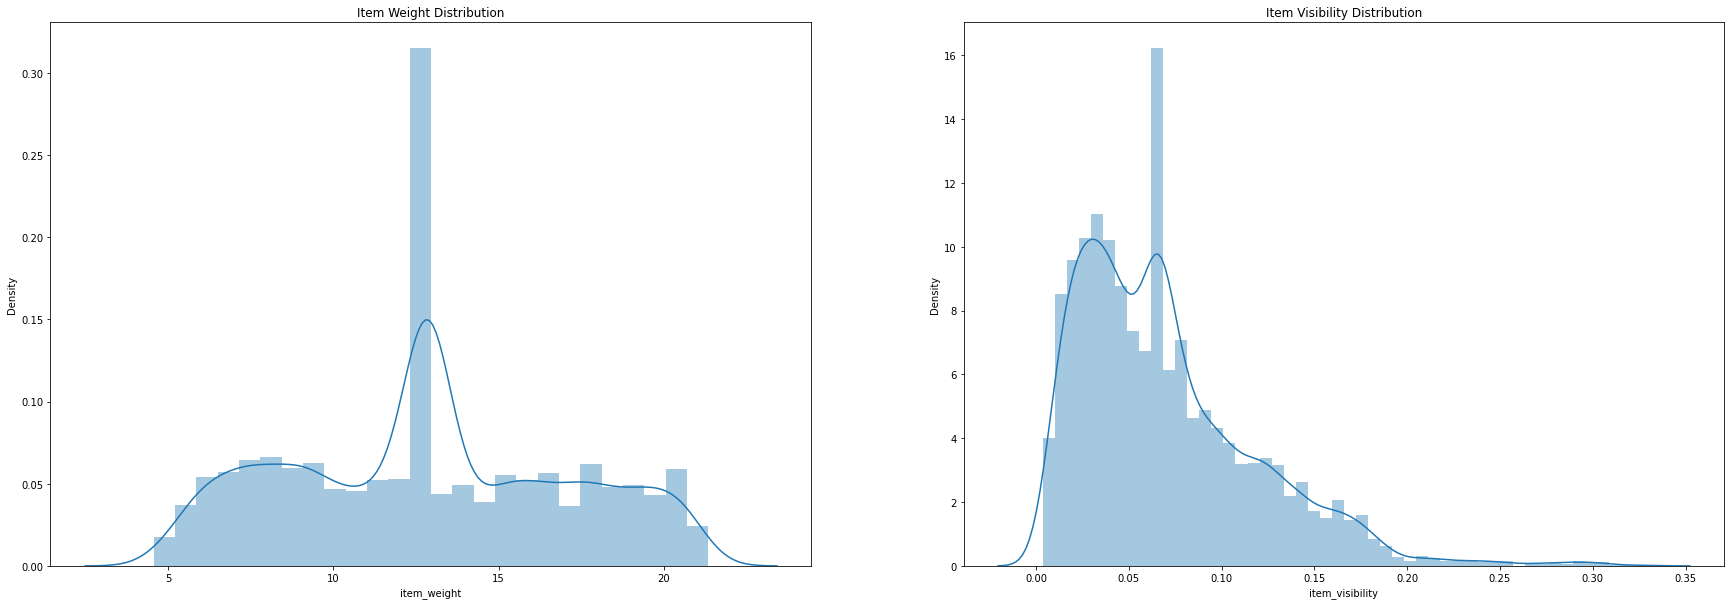

In [157]:
fig, axs = plt.subplots(1,2, figsize=(30,10))

sns.distplot((df["item_weight"]), ax=axs[0])
axs[0].set_title("Item Weight Distribution")

sns.distplot((df["item_visibility"]), ax=axs[1])
axs[1].set_title("Item Visibility Distribution");


### After the replacement of values with the averages of weight and visibility, we get many Items for one Value

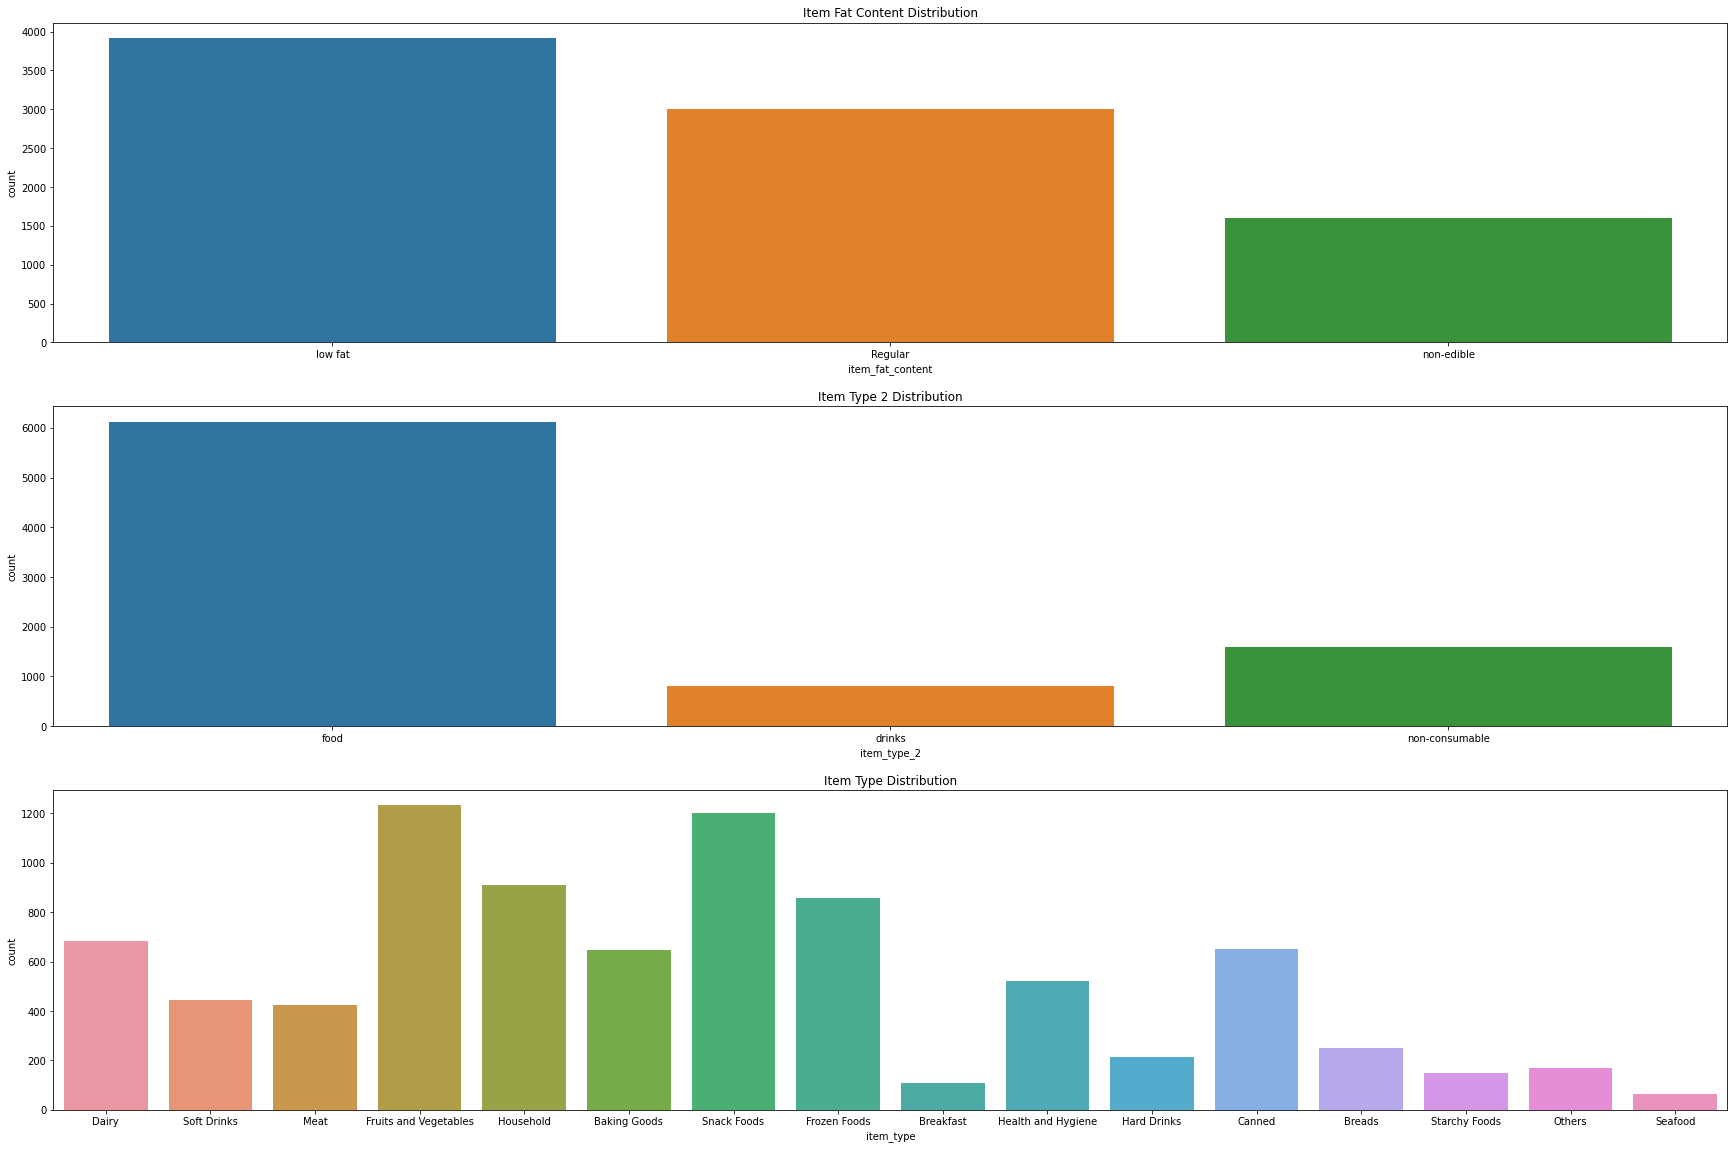

In [171]:
fig, axs = plt.subplots(3,1, figsize=(30,20))

sns.countplot((df["item_fat_content"]), ax=axs[0])
axs[0].set_title("Item Fat Content Distribution")

sns.countplot((df["item_type_2"]), ax=axs[1])
axs[1].set_title("Item Type 2 Distribution");

sns.countplot((df["item_type"]), ax=axs[2])
axs[2].set_title("Item Type Distribution");

In [ ]:
###  Most of the products are edibles

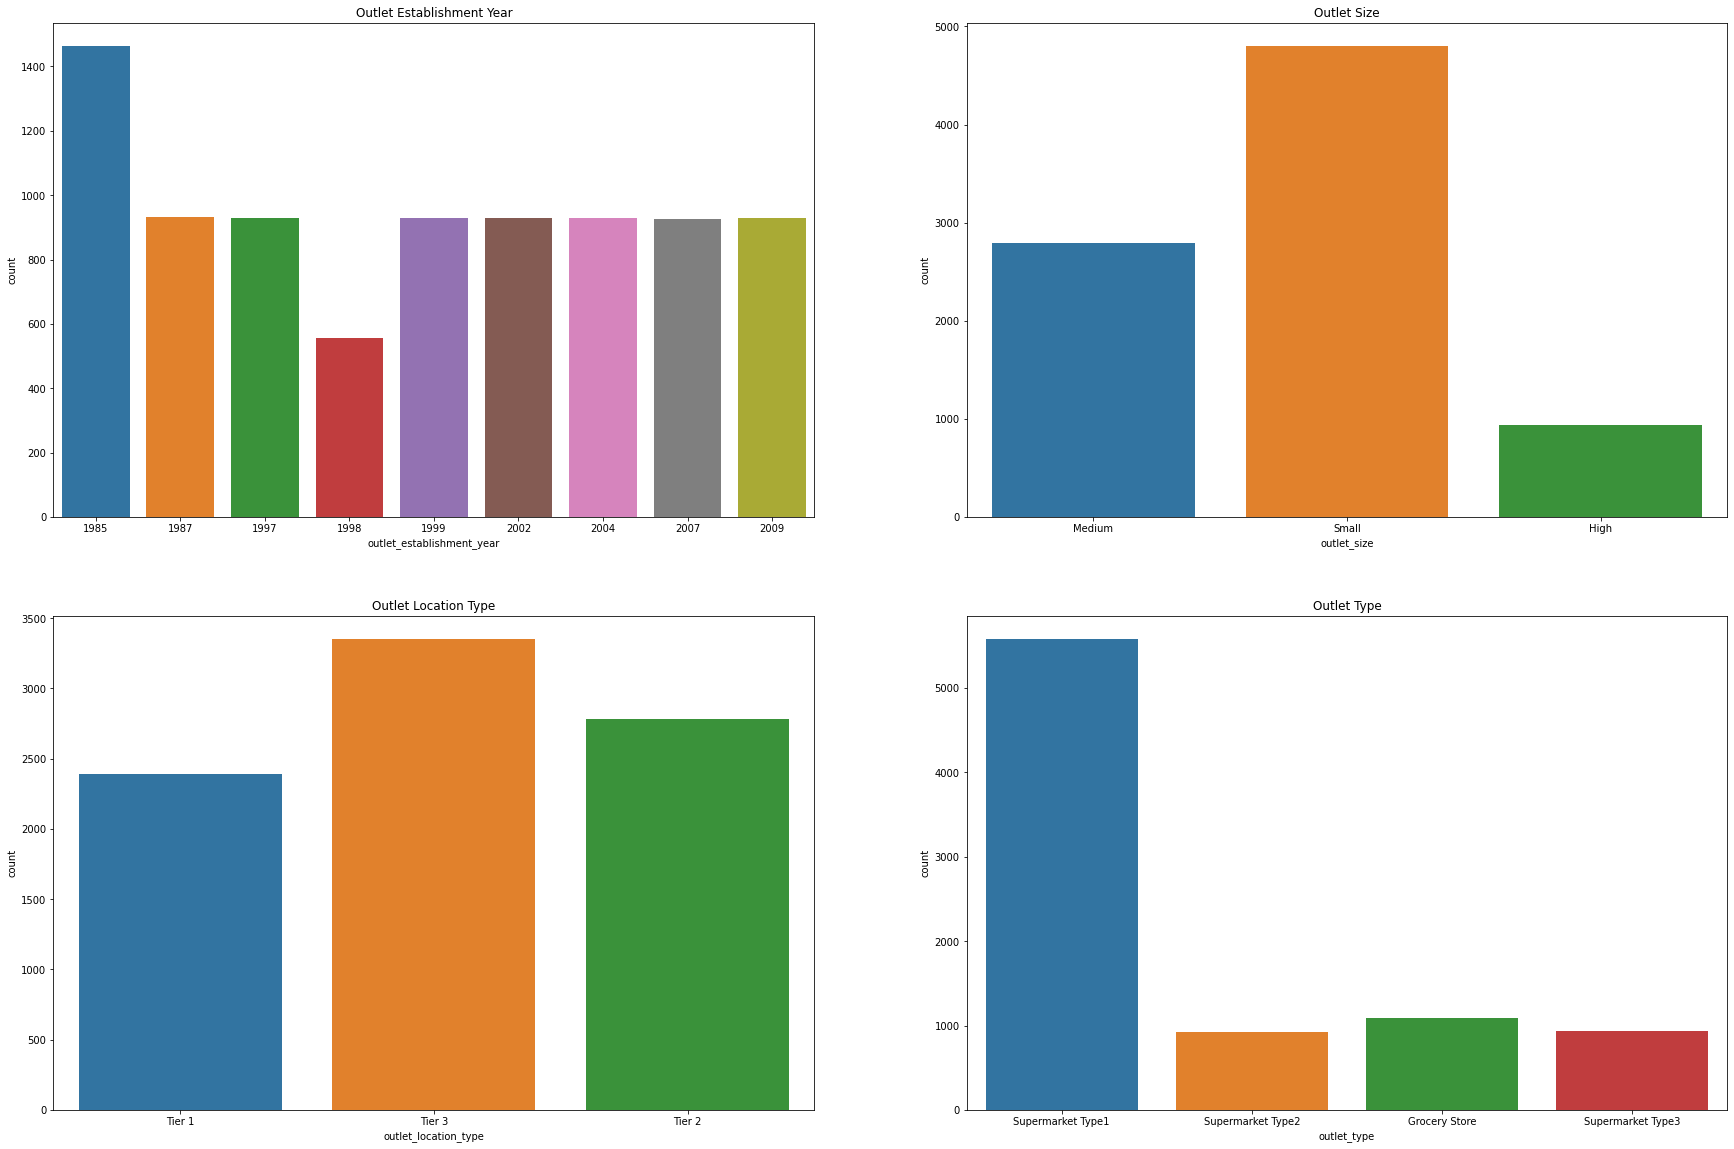

In [189]:
fig, axs = plt.subplots(2,2, figsize=(30,20))

df_year =pd.DataFrame((df["outlet_establishment_year"] -2013 )*-1)

sns.countplot((df_year["outlet_establishment_year"]), ax=axs[0,0])
axs[0,0].set_title("Outlet Establishment Year")

sns.countplot((df["outlet_size"]), ax=axs[0,1])
axs[0,1].set_title("Outlet Size");

sns.countplot((df["outlet_location_type"]), ax=axs[1,0])
axs[1,0].set_title("Outlet Location Type");

sns.countplot((df["outlet_type"]), ax=axs[1, 1])
axs[1,1].set_title("Outlet Type");

In [190]:
df

,item_identifier,item_weight,item_fat_content,item_visibility,item_type_2,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,low fat,0.016047,food,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,drinks,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,food,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,food,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,non-edible,0.066132,non-consumable,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,food,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,food,Baking Goods,108.1570,OUT045,11,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,non-edible,0.035186,non-consumable,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,food,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


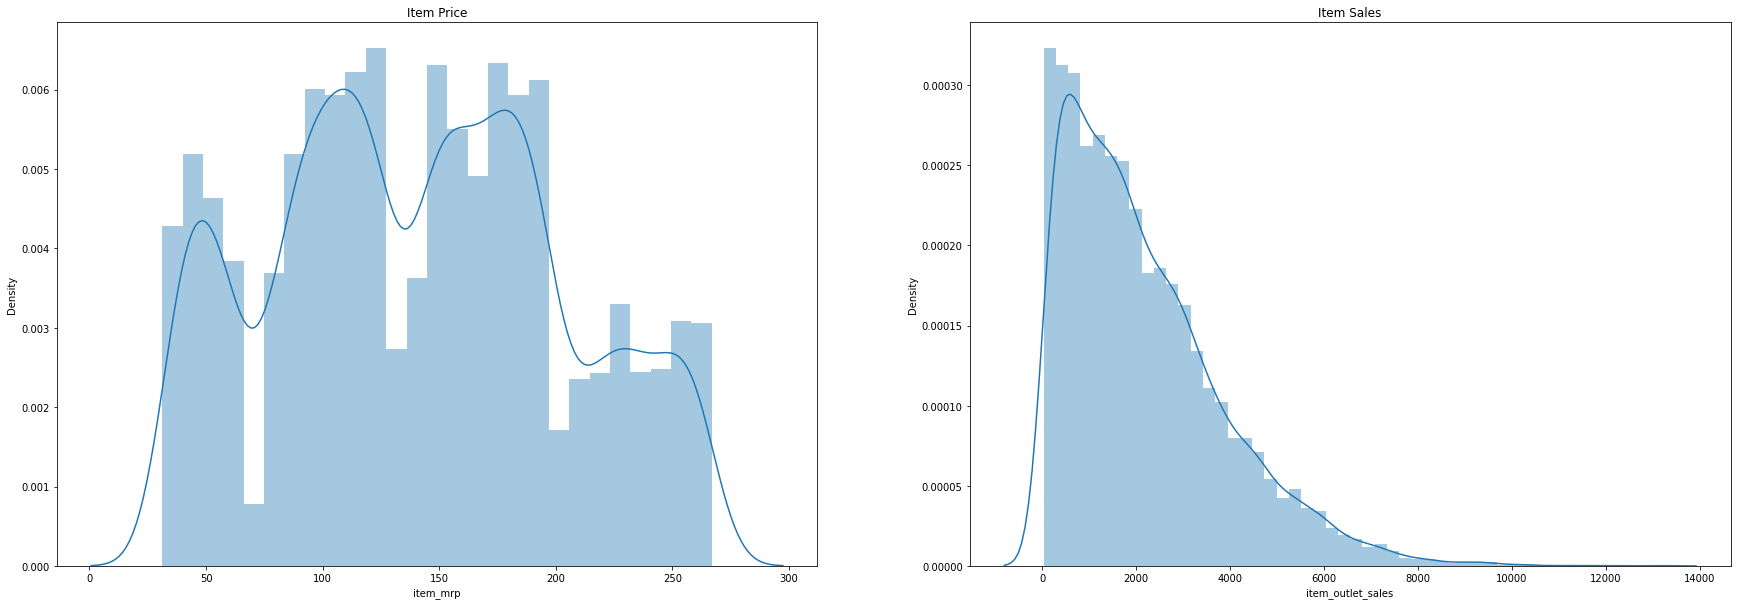

In [191]:
fig, axs = plt.subplots(1,2, figsize=(30,10))

sns.distplot((df["item_mrp"]), ax=axs[0])
axs[0].set_title("Item Price")

sns.distplot((df["item_outlet_sales"]), ax=axs[1])
axs[1].set_title("Item Sales");

## Since the whole sales are left skewed, we need to normalize the distribution with a Log

In [193]:
df["item_outlet_sales"] = np.log(1+df["item_outlet_sales"])

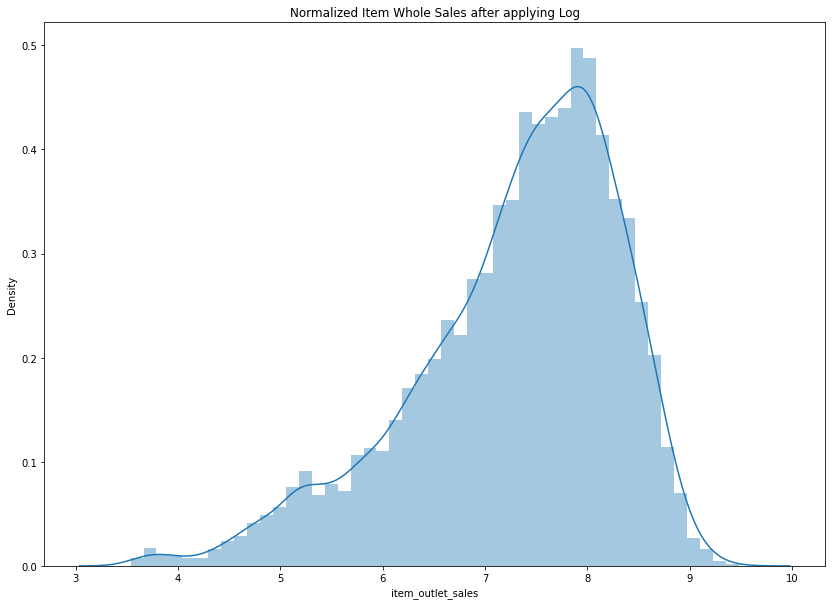

In [197]:
sns.distplot((df["item_outlet_sales"]))
plt.title("Normalized Item Whole Sales after applying Log");

In [ ]:
df.to_csv(f"data/train_clean_normalized.csv")